# 1. <font color='#cb4154'> **Support Vector Machines with Synthetic Data**</font>,

For this problem, we will generate synthetic data for a nonlinear binary classification problem and partition it into training, validation and test sets. Our goal is to understand the behavior of SVMs with Radial-Basis Function (RBF) kernels with different values of $C$ and $\gamma$.

In [1]:
#
# DO NOT EDIT THIS FUNCTION; IF YOU WANT TO PLAY AROUND WITH DATA GENERATION, 
# MAKE A COPY OF THIS FUNCTION AND THEN EDIT
#
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


def generate_data(n_samples, tst_frac=0.2, val_frac=0.2):
  # Generate a non-linear data set
  X, y = make_moons(n_samples=n_samples, noise=0.25, random_state=42)
   
  # Take a small subset of the data and make it VERY noisy; that is, generate outliers
  m = 30
  np.random.seed(30)
  ind = np.random.permutation(n_samples)[:m]
  X[ind, :] += np.random.multivariate_normal([0, 0], np.eye(2), (m, ))
  y[ind] = 1 - y[ind]
  
  # Plot this data
  cmap = ListedColormap(['#b30065', '#178000'])
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolors='k')       
  
  # First, we use train_test_split to partition (X, y) into training and test sets
  X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=tst_frac, 
                                                random_state=42)

  # Next, we use train_test_split to further partition (X_trn, y_trn) into training and validation sets
  X_trn, X_val, y_trn, y_val = train_test_split(X_trn, y_trn, test_size=val_frac, 
                                                random_state=42)
  
  return (X_trn, y_trn), (X_val, y_val), (X_tst, y_tst)

In [2]:
#
#  DO NOT EDIT THIS FUNCTION; IF YOU WANT TO PLAY AROUND WITH VISUALIZATION, 
#  MAKE A COPY OF THIS FUNCTION AND THEN EDIT 
#

def visualize(models, param, X, y):
  # Initialize plotting
  if len(models) % 3 == 0:
    nrows = len(models) // 3
  else:
    nrows = len(models) // 3 + 1
    
  fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, 5.0 * nrows))
  cmap = ListedColormap(['#b30065', '#178000'])

  # Create a mesh
  xMin, xMax = X[:, 0].min() - 1, X[:, 0].max() + 1
  yMin, yMax = X[:, 1].min() - 1, X[:, 1].max() + 1
  xMesh, yMesh = np.meshgrid(np.arange(xMin, xMax, 0.01), 
                             np.arange(yMin, yMax, 0.01))

  for i, (p, clf) in enumerate(models.items()):
    # if i > 0:
    #   break
    r, c = np.divmod(i, 3)
    ax = axes[r, c]

    # Plot contours
    zMesh = clf.decision_function(np.c_[xMesh.ravel(), yMesh.ravel()])
    zMesh = zMesh.reshape(xMesh.shape)
    ax.contourf(xMesh, yMesh, zMesh, cmap=plt.cm.PiYG, alpha=0.6)

    if (param == 'C' and p > 0.0) or (param == 'gamma'):
      ax.contour(xMesh, yMesh, zMesh, colors='k', levels=[-1, 0, 1], 
                 alpha=0.5, linestyles=['--', '-', '--'])

    # Plot data
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolors='k')       
    ax.set_title('{0} = {1}'.format(param, p))

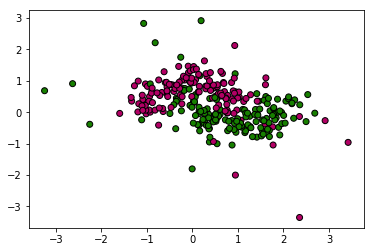

In [3]:
# Generate the data
n_samples = 300    # Total size of data set 
(X_trn, y_trn), (X_val, y_val), (X_tst, y_tst) = generate_data(n_samples)

---
The effect of the regularization parameter, $C$
Complete the Python code snippet below that takes the generated synthetic 2-d data as input and learns non-linear SVMs. Use scikit-learn's [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) function to learn SVM models with **radial-basis kernels** for fixed $\gamma$ and various choices of $C \in \{10^{-3}, 10^{-2}\, \cdots, 1, \, \cdots\, 10^5\}$. The value of $\gamma$ is fixed to $\gamma = \frac{1}{d \cdot \sigma_X}$, where $d$ is the data dimension and $\sigma_X$ is the standard deviation of the data set $X$. SVC can automatically use these setting for $\gamma$ if you pass the argument gamma = 'scale' (see documentation for more details).

**Plot**: For each classifier, compute **both** the **training error** and the **validation error**. Plot them together, making sure to label the axes and each curve clearly.

**Discussion**: How do the training error and the validation error change with $C$? Based on the visualization of the models and their resulting classifiers, how does changing $C$ change the models? Explain in terms of minimizing the SVM's objective function $\frac{1}{2} \mathbf{w}^\prime \mathbf{w} \, + \, C \, \Sigma_{i=1}^n \, \ell(\mathbf{w} \mid \mathbf{x}_i, y_i)$, where $\ell$ is the hinge loss for each training example $(\mathbf{x}_i, y_i)$.

**Final Model Selection**: Use the validation set to select the best the classifier corresponding to the best value, $C_{best}$. Report the accuracy on the **test set** for this selected best SVM model. _Note: You should report a single number, your final test set accuracy on the model corresponding to $C_{best}$_.

accuracy on test set for C_best=1: 
0.8333333333333334


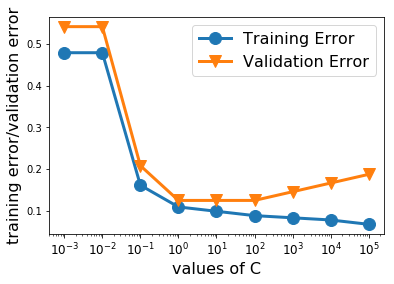

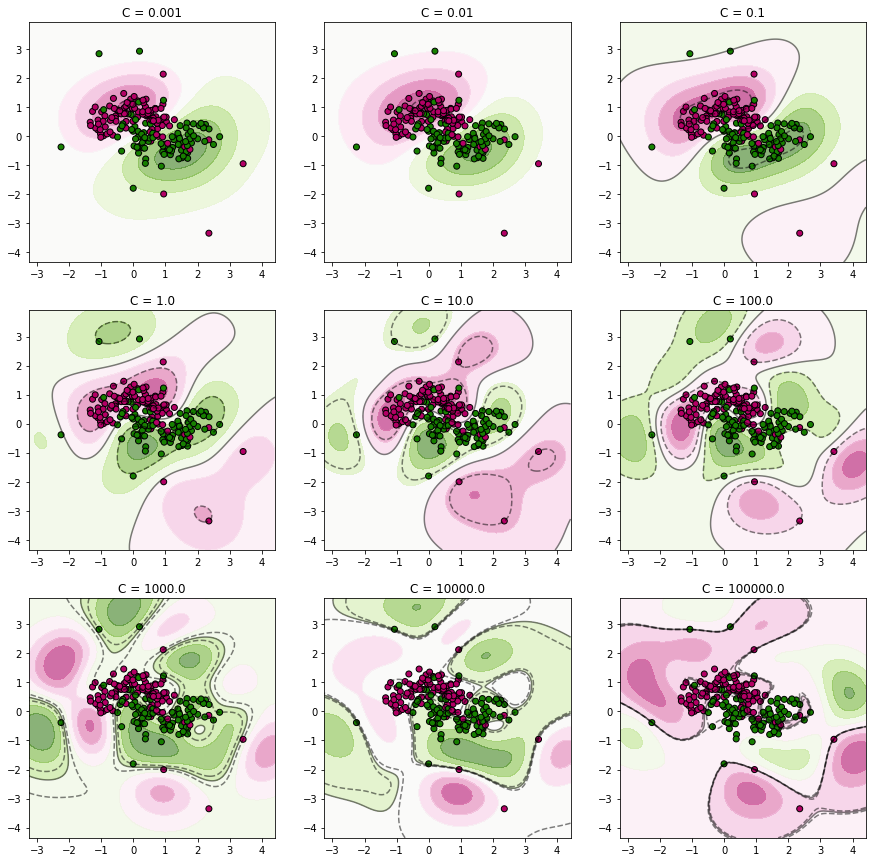

In [5]:
from sklearn.svm import SVC
# Learn support vector classifiers with a radial-basis function kernel with 
# fixed gamma = 1 / (n_features * X.std()) and different values of C
C_range = np.arange(-3.0, 6.0, 1.0)
C_values = np.power(10.0, C_range)

models = dict()
trnErr = dict()
valErr = dict()

for C in C_values:
    models[C] = SVC(C=C,kernel='rbf',degree=3,gamma='scale',random_state=42)
    trnErr[C] = 1-models[C].fit(X_trn,y_trn).score(X_trn,y_trn)
    valErr[C] = 1-models[C].fit(X_trn,y_trn).score(X_val,y_val)
    

plt.figure()
plt.semilogx(trnErr.keys(), trnErr.values(), marker='o', linewidth=3, markersize=12)
plt.semilogx(valErr.keys(), valErr.values(), marker='v', linewidth=3, markersize=12)
plt.xlabel('values of C',fontsize=16)
plt.ylabel('training error/validation error',fontsize=16)
plt.xticks(list(trnErr.keys()), fontsize=12)
plt.legend(['Training Error','Validation Error'],fontsize=16)
#plt.axis([0.0009,1000,0,1])

#Q : Discussion: How do the training error and the validation error change with  ùê∂ ? Based on the visualization of the models 
#and their resulting classifiers, how does changing  ùê∂  change the models? Explain in terms of minimizing the SVM's 
#objective function  12ùê∞‚Ä≤ùê∞+ùê∂Œ£ùëõùëñ=1‚Ñì(ùê∞‚à£ùê±ùëñ,ùë¶ùëñ) , where  ‚Ñì  is the hinge loss for each training example  (ùê±ùëñ,ùë¶ùëñ) .




visualize(models, 'C', X_trn, y_trn)

# selected best C is 1 with lowest validation error .'
# accuracy on test set'
print("accuracy on test set for C_best=1: ")
print(models[1].fit(X_trn,y_trn).score(X_tst,y_tst))



---
The effect of the RBF kernel parameter, $\gamma$
Complete the Python code snippet below that takes the generated synthetic 2-d data as input and learns various non-linear SVMs. Use scikit-learn's [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) function to learn SVM models with **radial-basis kernels** for fixed $C$ and various choices of $\gamma \in \{10^{-2}, 10^{-1}\, 1, 10, \, 10^2 \, 10^3\}$. The value of $C$ is fixed to $C = 10$.

**Plot**: For each classifier, compute **both** the **training error** and the **validation error**. Plot them together, making sure to label the axes and each curve clearly.

**Discussion**: How do the training error and the validation error change with $\gamma$? Based on the visualization of the models and their resulting classifiers, how does changing $\gamma$ change the models? Explain in terms of the functional form of the RBF kernel, $\kappa(\mathbf{x}, \,\mathbf{z}) \, = \, \exp(-\gamma \cdot \|\mathbf{x} - \mathbf{z} \|^2)$

**Final Model Selection**: Use the validation set to select the best the classifier corresponding to the best value, $\gamma_{best}$. Report the accuracy on the **test set** for this selected best SVM model. _Note: You should report a single number, your final test set accuracy on the model corresponding to $\gamma_{best}$_.

accuracy on test set for gamma_best=1: 
0.8333333333333334


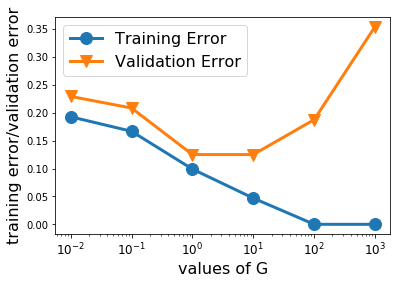

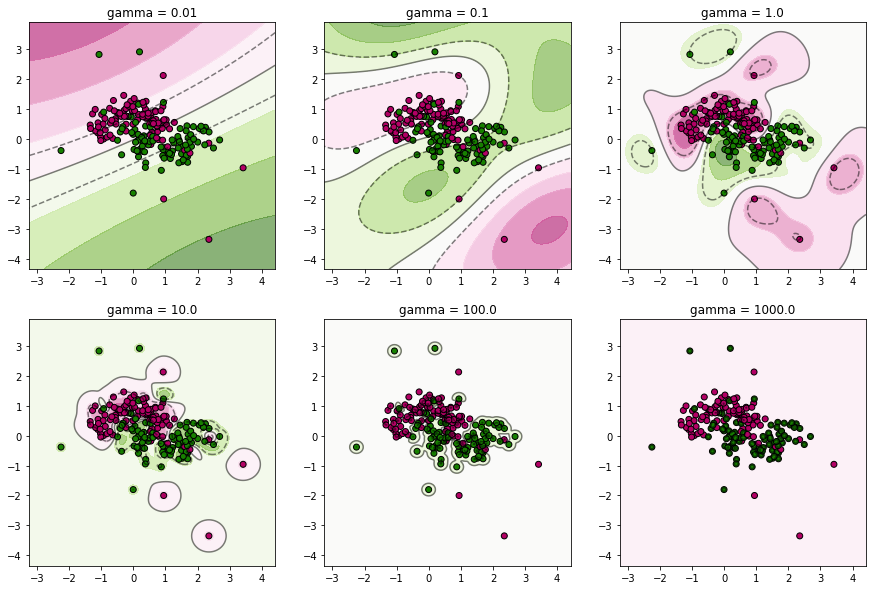

In [6]:
# Learn support vector classifiers with a radial-basis function kernel with 
# fixed C = 10.0 and different values of gamma
gamma_range = np.arange(-2.0, 4.0, 1.0)
gamma_values = np.power(10.0, gamma_range)

models = dict()
trnErr = dict()
valErr = dict()

for G in gamma_values:
        models[G] = SVC(C=10,kernel='rbf',degree=3,gamma=G,random_state=42)
        trnErr[G] = 1-models[G].fit(X_trn,y_trn).score(X_trn,y_trn)
        valErr[G] = 1-models[G].fit(X_trn,y_trn).score(X_val,y_val)
        
  
plt.figure()
plt.semilogx(trnErr.keys(), trnErr.values(), marker='o', linewidth=3, markersize=12)
plt.semilogx(valErr.keys(), valErr.values(), marker='v', linewidth=3, markersize=12)
plt.xlabel('values of G',fontsize=16)
plt.ylabel('training error/validation error',fontsize=16)
plt.xticks(list(trnErr.keys()), fontsize=12)
plt.legend(['Training Error','Validation Error'],fontsize=16)
#plt.axis([0.0009,1000,0,1])

#Q : How do the training error and the validation error change with  ùõæ ? Based on the visualization of the models and their 
#resulting classifiers, how does changing  ùõæ  change the models? Explain in terms of the functional form of the RBF kernel,  
# ùúÖ(ùê±,ùê≥)=exp(‚àíùõæ‚ãÖ‚Äñùê±‚àíùê≥‚Äñ2) 

# Ans: The training error decreases continously as gamma increases whereas the validation error decreases till gamma = 1 and then
#continuously increases. As gamma increases, the kernel value decreases (ùúÖ(ùê±,ùê≥)=exp(‚àíùõæ‚ãÖ‚Äñùê±‚àíùê≥‚Äñ2)) in the dual expression 
# (1/2*W.T*W) hence, the regularization term decreases and model becomes more complex with lower error. Training error decreases
# as gamma increases. 


visualize(models, 'gamma', X_trn, y_trn)


print("accuracy on test set for gamma_best=1: ")
print(models[1].fit(X_trn,y_trn).score(X_tst,y_tst))

---
# 2. <font color='#cb4154'> **Breast Cancer Diagnosis with Support Vector Machines**</font> 

For this problem, we will use the [Wisconsin Breast Cancer](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) data set, which has already been pre-processed and partitioned into training, validation and test sets. Numpy's [loadtxt](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.loadtxt.html) command can be used to load CSV files.

In [7]:
# Load the Breast Cancer Diagnosis data set; download the files from eLearning
# CSV files can be read easily using np.loadtxt()
trn_x = np.loadtxt('wdbc_trn.csv',delimiter=',',usecols=range(1,31))
trn_y = np.loadtxt('wdbc_trn.csv',delimiter=',',usecols=(0))
val_x = np.loadtxt('wdbc_val.csv',delimiter=',',usecols=range(1,31))
val_y = np.loadtxt('wdbc_val.csv',delimiter=',',usecols=(0))
tst_x = np.loadtxt('wdbc_tst.csv',delimiter=',',usecols=range(1,31))
tst_y = np.loadtxt('wdbc_tst.csv',delimiter=',',usecols=(0))
# print(trn_x.shape)
# print(trn_y.shape)
# print(val_x.shape)
# print(val_y.shape)
# print(tst_x)
# print(tst_y.shape)

Use scikit-learn's [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) function to learn SVM models with **radial-basis kernels** for **each combination** of $C \in \{10^{-2}, 10^{-1}, 1, 10^1, \, \cdots\, 10^4\}$ and $\gamma \in \{10^{-3}, 10^{-2}\, 10^{-1}, 1, \, 10, \, 10^2\}$. Print the tables corresponding to the training and validation errors.

**Final Model Selection**: Use the validation set to select the best the classifier corresponding to the best parameter values, $C_{best}$ and $\gamma_{best}$. Report the accuracy on the **test set** for this selected best SVM model. _Note: You should report a single number, your final test set accuracy on the model corresponding to $C_{best}$ and $\gamma_{best}$_.

In [8]:
from decimal import Decimal
# from tabulate import tabulate
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from collections import defaultdict
# Learn support vector classifiers with a radial-basis function kernel with 
# fixed gamma = 1 / (n_features * X.std()) and different values of C
C_range = np.arange(-2.0, 4.0, 1.0)
C_values = np.power(10.0, C_range)
gamma_range = np.arange(-3.0, 2.0, 1.0)
gamma_values = np.power(10.0, gamma_range)

models = dict(dict())
trnErr = dict(dict())
valErr = dict(dict())

for G in gamma_values:
    models[G] = dict()
    trnErr[G] = dict()
    valErr[G] = dict()
    for C in C_values: 
        models[G][C] = SVC(C=C,kernel='rbf',degree=3,gamma=G,random_state=42)
        trnErr[G][C] = 1-models[G][C].fit(trn_x,trn_y).score(trn_x,trn_y)
        valErr[G][C] = 1-models[G][C].fit(trn_x,trn_y).score(val_x,val_y)
        
# print(tabulate(trnErr.items()))

print('rows as C : columns as G')
print('training Error table')
print(pd.DataFrame.from_dict(trnErr))  
print('validation Error table')
print(pd.DataFrame.from_dict(valErr))

#Best SVM model for G=0.01 and C=100
accuracy = models[0.01][100].fit(trn_x,trn_y).score(tst_x,tst_y)
print("accuracy on test set for C_best=100 & G_best=0.01: ")
print(accuracy)

    
    
    



rows as C : columns as G
training Error table
           0.001     0.010     0.100     1.000     10.000
0.01     0.371681  0.371681  0.371681  0.371681  0.371681
0.10     0.306785  0.050147  0.035398  0.371681  0.371681
1.00     0.047198  0.029499  0.011799  0.000000  0.000000
10.00    0.026549  0.011799  0.000000  0.000000  0.000000
100.00   0.014749  0.002950  0.000000  0.000000  0.000000
1000.00  0.005900  0.000000  0.000000  0.000000  0.000000
validation Error table
           0.001     0.010     0.100     1.000     10.000
0.01     0.373913  0.373913  0.373913  0.373913  0.373913
0.10     0.304348  0.069565  0.078261  0.373913  0.373913
1.00     0.060870  0.060870  0.043478  0.373913  0.373913
10.00    0.034783  0.043478  0.034783  0.373913  0.373913
100.00   0.034783  0.026087  0.034783  0.373913  0.373913
1000.00  0.034783  0.026087  0.034783  0.373913  0.373913
accuracy on test set for C_best=100 & G_best=0.01: 
0.9652173913043478




---